<a href="https://colab.research.google.com/github/Nonbangkok/AstroCode/blob/main/astrocode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  โจทย์ข้อ 2. กฎของฮับเบิลและการประมาณอายุของเอกภพ
    
นายธนกฤต โพธิ์นิ่มไทย ม.5 โรงเรียนดรุณสิกขาลัย (jadai.tk007@gmail.com) [Thanakrit Ponimthai] \
นางสาวนวินดา เลิศเพ็ญเมธา ม.5 โรงเรียนดรุณสิกขาลัย (tanyaporn.kes@gmail.com) [Navinda Lertpenmetha] \
นายกิตติธัช ทิพย์มณฑา ม.5 โรงเรียนเบญจมราชูทิศ (nonbangkokgamer@gmail.com) [Kittitouch Thipmontha] \
ครูที่ปรึกษา: ผศ.ดร. เอกพงษ์ หิรัญสิริสวัสดิ์  โรงเรียนดรุณสิกขาลัย (ekapong.hir@kmutt.ac.th) [Ekapong Hirunsirisawat]

## Import necessary library

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import requests

## Get data from link google drive

In [85]:
url = 'https://drive.google.com/file/d/1DeceWp9HT1cjBx0AMoOXQ8WSSd5c26ck/view'

file_id = url.split('/')[-2]

download_url = f'https://drive.google.com/uc?id={file_id}&export=download'

response = requests.get(download_url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
else:
    print(f"Error: {response.status_code} - Unable to download JSON file")

df['m'] = data['Apparent Magitude (m)']
df['M'] = data['Absolute Magnitude (M)']
df['z'] = data['Redshift (z)']

df

,Apparent Magitude (m),Absolute Magnitude (M),Redshift (z),m,M,z
0,14.541391,-16.339065,0.003676,14.541391,-16.339065,0.003676
1,16.756129,-18.177730,0.022604,16.756129,-18.177730,0.022604
2,15.829605,-16.696145,0.008038,15.829605,-16.696145,0.008038
3,16.294575,-19.512265,0.036352,16.294575,-19.512265,0.036352
4,13.829094,-19.665756,0.010395,13.829094,-19.665756,0.010395
5,14.182569,-21.249230,0.033587,14.182569,-21.249230,0.033587
6,16.039077,-17.778063,0.014448,16.039077,-17.778063,0.014448
7,17.138868,-17.656339,0.017838,17.138868,-17.656339,0.017838
8,15.998251,-19.397655,0.030485,15.998251,-19.397655,0.030485
9,17.910487,-16.931928,0.025338,17.910487,-16.931928,0.025338


## Calculate distance and recession valocity of galaxy



In [86]:
v_light = 299792458 # constant speed of light in m/s

df['d'] = pow(10, (df['m'] - df['M'] + 5) / 5) # distance = 10^((m - M + 5) / 5), m = Apparent Magitude, M = Absolute Magnitude
df['v'] = df['z'] * v_light # recession velocity of galaxy = z * c; c = speed of light, z = redshift
df['v'] /= 1e3; # transform unit from m/s to km/s
df['d'] /= 1e6 # transform unit from pc to Mpc

df # print dataFrame

,Apparent Magitude (m),Absolute Magnitude (M),Redshift (z),m,M,z,d,v
0,14.541391,-16.339065,0.003676,14.541391,-16.339065,0.003676,15.0,1102.027175
1,16.756129,-18.177730,0.022604,16.756129,-18.177730,0.022604,97.0,6776.580838
2,15.829605,-16.696145,0.008038,15.829605,-16.696145,0.008038,32.0,2409.687714
3,16.294575,-19.512265,0.036352,16.294575,-19.512265,0.036352,145.0,10897.970095
4,13.829094,-19.665756,0.010395,13.829094,-19.665756,0.010395,50.0,3116.199574
5,14.182569,-21.249230,0.033587,14.182569,-21.249230,0.033587,122.0,10069.014985
6,16.039077,-17.778063,0.014448,16.039077,-17.778063,0.014448,58.0,4331.291811
7,17.138868,-17.656339,0.017838,17.138868,-17.656339,0.017838,91.0,5347.696740
8,15.998251,-19.397655,0.030485,15.998251,-19.397655,0.030485,120.0,9139.257376
9,17.910487,-16.931928,0.025338,17.910487,-16.931928,0.025338,93.0,7596.218815


## Plot chart of distance and recession velocity and do linear regression

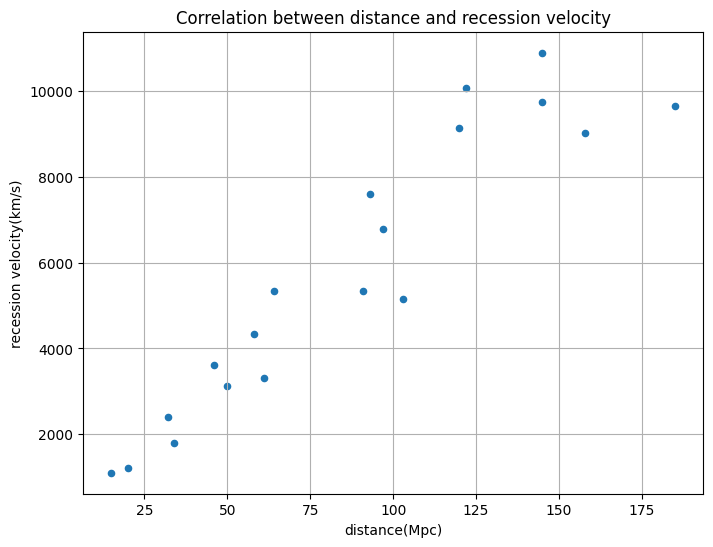

In [87]:
# plot chart relationship between distance and recession velocity of galaxy
plt.figure(figsize = (8, 6))
plt.scatter(df['d'], df['v'], s = 20)
plt.xlabel('distance(Mpc)')
plt.ylabel('recession velocity(km/s)')
plt.title('Correlation between distance and recession velocity')
plt.grid(True)
plt.show()

## Linear regression for calculate Hubble constant

Slope(H0): 65.6299463885447
Error(MSE): 1259379.1688940628
Error(H0): 5.974288841626507
Standard Error of the Slope: 5.6122455960570115


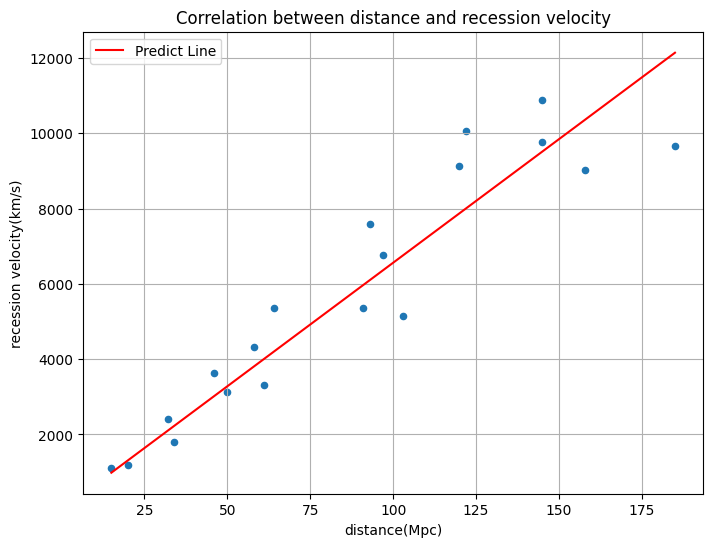

In [88]:
# do linear regression and find slope of predict line for H0

plt.figure(figsize = (8, 6))
plt.scatter(df['d'], df['v'], s = 20)
plt.xlabel('distance(Mpc)')
plt.ylabel('recession velocity(km/s)')
plt.title('Correlation between distance and recession velocity')
plt.grid(True)

# linear regression without intercept
X = df[['d']].values
y = df['v'].values
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
x_range = np.linspace(df['d'].min(), df['d'].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Predict Line')

# calculate error
True_Hubble = 69.8
slope = model.coef_[0]
errorMSE = mean_squared_error(y, model.predict(X))
errorH0 = abs(True_Hubble - slope)/True_Hubble * 100

# calculate standard error of the slope
residuals = y - model.predict(X)
std_err_regression = np.sqrt(np.sum(residuals**2) / (len(X) - 2))
std_err_slope = std_err_regression / np.sqrt(np.sum((X[:, 0] - np.mean(X[:, 0]))**2))

print(f"Slope(H0): {slope}")
print(f"Error(MSE): {errorMSE}")
print(f"Error(H0): {errorH0}")
print(f"Standard Error of the Slope: {std_err_slope}")

plt.legend()
plt.show()

## Calculate age of universe

In [89]:
second = 1 / (slope * (1 / ( 3.086 * pow(10, 19)))) # transform unit from km/s/Mpc to s
age_of_universe = second / 31536000 # transform unit from s to year
print(f"{age_of_universe} years")

14910330336.48459 years
